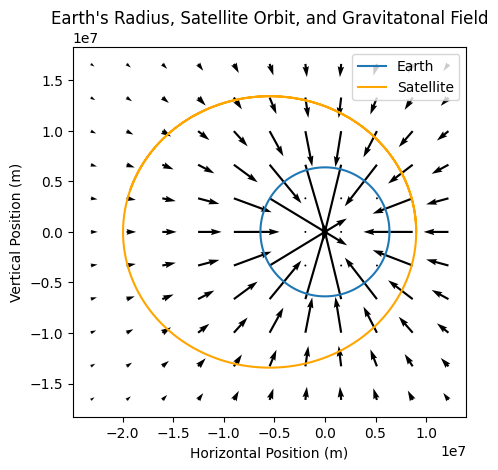

In [77]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# declare constants
G = 6.6738E-11 # Nm^2/kg^2, gravitational constant
r_e = 6.378E6 # radius of the earth, m
pos_e = np.array([0, 0]) # the earth is at (0,0), m
m_e = 5.972E24 # mass of the earth, kg
a = 2.645E6 # altitude of the satellite above earth, m

pos_s = np.array([r_e + a, 0]) # position of the satellite, m
v = np.array([0, 7.8E3]) # inital tangential velocity, m / s

# return the gravitational field strength as a vector
def gfield_vector(m, r_e, pos_e, pos_o):
    r = pos_e - pos_o # distance
    r_mag = np.linalg.norm(r) # normalize
    if r_mag < r_e: # inside the earth
        print("Inside the Earth") 
    rhat = r / r_mag # unit vector
    g = G * m / (r_mag ** 2) * rhat # Fg = Gm1m1/r^2
    return g

# return the gravitational field strength as a tuple
def gfield(m, r_o, pos_o, pos_x, pos_y):
    rx = pos_o[0] - pos_x
    ry = pos_o[1] - pos_y
    r = np.array([rx, ry]) # distance
    r_mag = np.linalg.norm(r) # normalize
    if r_mag < r_o: # inside the earth
        return (0, 0)
    rhat = r / r_mag # unit vector
    g_mag = G * m / (r_mag ** 2) # Fg = Gm1m1/r^2
    # convert to tuple
    gx = g_mag * rhat[0]
    gy = g_mag * rhat[1]
    return (gx, gy) 

t = 0 # initial time 
dt = 1 # each time step will be 1 seconds

# declare lists
xlist = [pos_s[0]] # m
ylist = [pos_s[1]] # m

tlist = [t] # s

t_orbit = ((r_e + pos_s[0]) * 2 * np.pi) / v[1] # estimate the seconds it takes to orbit
while t < t_orbit * 2: # wrong estimate, double so that we complete a full orbit
    a = gfield_vector(m_e, r_e, pos_e, pos_s)
    v = v + a * dt # update velocity
    pos_s = pos_s + v * dt # update position

    t += dt # update time

    # update lists
    xlist.append(pos_s[0])
    ylist.append(pos_s[1])

    tlist.append(t)

# create an evenly spaced graph with nice dimensions
max_x = max(xlist)
min_x = min(xlist)
divisions_x = int(np.ceil((max_x - min_x) / r_e))

max_y = max(ylist)
min_y = min(ylist)
divisions_y = int(np.ceil((max_y - min_y) / r_e))

# create x and y axes
x = np.linspace(min_x - 0.5 * r_e, max_x + 0.5 * r_e, divisions_x * 2 + 1)
y = np.linspace(min_y - 0.5 * r_e, max_y + 0.5 * r_e, divisions_y * 2 + 1)

# create the grid
X,Y = np.meshgrid(x, y)

# caluclate the field strength for each point
u = np.zeros(X.shape)
v = np.zeros(Y.shape)


for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        u[i, j], v[i, j] = gfield(m_e, r_e, pos_e, X[i, j], Y[i, j])

# plots!
plt.quiver(X, Y, u, v) # quiver (arrow) plot
plt.plot(r_e*np.cos(np.linspace(0,np.pi*2,361)),r_e*np.sin(np.linspace(0,np.pi*2,361)), label="Earth") # earth
plt.plot(xlist, ylist, color="orange", label="Satellite") # satellite trajectory
plt.xlabel("Horizontal Position (m)") # x label
plt.ylabel("Vertical Position (m)") # y label
plt.title("Earth's Radius, Satellite Orbit, and Gravitatonal Field") # title
plt.axis('scaled') # scale the graph
plt.legend() # autocomplete the graph
plt.show() # show the graph


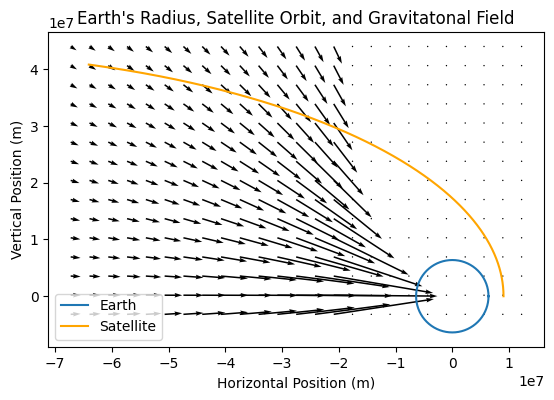

In [78]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# declare constants
G = 6.6738E-11 # Nm^2/kg^2, gravitational constant
r_e = 6.378E6 # radius of the earth, m
pos_e = np.array([0, 0]) # the earth is at (0,0), m
m_e = 5.972E24 # mass of the earth, kg
a = 2.645E6 # altitude of the satellite above earth, m

pos_s = np.array([r_e + a, 0]) # position of the satellite, m
v = np.array([0, 9.2E3]) # inital tangential velocity, m / s. 
# This has been increased to make the satellite reach escape velocity

# return the gravitational field strength as a vector
def gfield_vector(m, r_e, pos_e, pos_o):
    r = pos_e - pos_o # distance
    r_mag = np.linalg.norm(r) # normalize
    if r_mag < r_e: # inside the earth
        print("Inside the Earth") 
    rhat = r / r_mag # unit vector
    g = G * m / (r_mag ** 2) * rhat # Fg = Gm1m1/r^2
    return g

# return the gravitational field strength as a tuple
def gfield(m, r_o, pos_o, pos_x, pos_y):
    rx = pos_o[0] - pos_x
    ry = pos_o[1] - pos_y
    r = np.array([rx, ry]) # distance
    r_mag = np.linalg.norm(r) # normalize
    if r_mag < r_o: # inside the earth
        return (0, 0)
    rhat = r / r_mag # unit vector
    g_mag = G * m / (r_mag ** 2) # Fg = Gm1m1/r^2
    # convert to tuple
    gx = g_mag * rhat[0]
    gy = g_mag * rhat[1]
    return (gx, gy) 

t = 0 # initial time 
dt = 1 # each time step will be 1 seconds

# declare lists
xlist = [pos_s[0]] # m
ylist = [pos_s[1]] # m

tlist = [t] # s

t_orbit = ((r_e + pos_s[0]) * 2 * np.pi) / v[1] # estimate the seconds it takes to orbit
while t < t_orbit * 2: # wrong estimate, double so that we complete a full orbit
    a = gfield_vector(m_e, r_e, pos_e, pos_s)
    v = v + a * dt # update velocity
    pos_s = pos_s + v * dt # update position

    t += dt # update time

    # update lists
    xlist.append(pos_s[0])
    ylist.append(pos_s[1])

    tlist.append(t)

# create an evenly spaced graph with nice dimensions
max_x = max(xlist)
min_x = min(xlist)
divisions_x = int(np.ceil((max_x - min_x) / r_e))

max_y = max(ylist)
min_y = min(ylist)
divisions_y = int(np.ceil((max_y - min_y) / r_e))

# create x and y axes
x = np.linspace(min_x - 0.5 * r_e, max_x + 0.5 * r_e, divisions_x * 2 + 1)
y = np.linspace(min_y - 0.5 * r_e, max_y + 0.5 * r_e, divisions_y * 2 + 1)

# create the grid
X,Y = np.meshgrid(x, y)

# caluclate the field strength for each point
u = np.zeros(X.shape)
v = np.zeros(Y.shape)


for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        u[i, j], v[i, j] = gfield(m_e, r_e, pos_e, X[i, j], Y[i, j])

# plots!
plt.quiver(X, Y, u, v) # quiver (arrow) plot
plt.plot(r_e*np.cos(np.linspace(0,np.pi*2,361)),r_e*np.sin(np.linspace(0,np.pi*2,361)), label="Earth") # earth
plt.plot(xlist, ylist, color="orange", label="Satellite") # satellite trajectory
plt.xlabel("Horizontal Position (m)") # x label
plt.ylabel("Vertical Position (m)") # y label
plt.title("Earth's Radius, Satellite Orbit, and Gravitatonal Field") # title
plt.axis('scaled') # scale the graph
plt.legend() # autocomplete the graph
plt.show() # show the graph


Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Earth
Inside the Ear

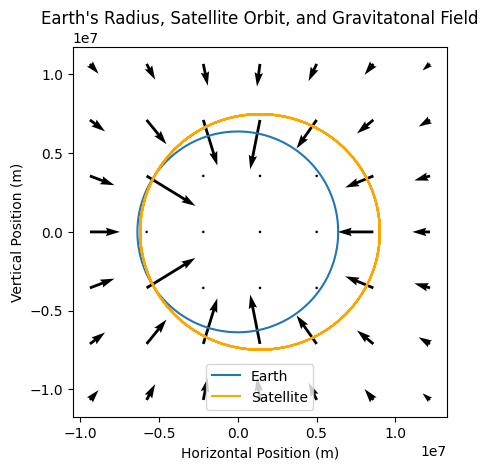

In [79]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# declare constants
G = 6.6738E-11 # Nm^2/kg^2, gravitational constant
r_e = 6.378E6 # radius of the earth, m
pos_e = np.array([0, 0]) # the earth is at (0,0), m
m_e = 5.972E24 # mass of the earth, kg
a = 2.645E6 # altitude of the satellite above earth, m

pos_s = np.array([r_e + a, 0]) # position of the satellite, m
v = np.array([0, 6.0E3]) # inital tangential velocity, m / s
# this has been lowered enough that the satellite crashes into the earth

# return the gravitational field strength as a vector
def gfield_vector(m, r_e, pos_e, pos_o):
    r = pos_e - pos_o # distance
    r_mag = np.linalg.norm(r) # normalize
    if r_mag < r_e: # inside the earth
        print("Inside the Earth") 
    rhat = r / r_mag # unit vector
    g = G * m / (r_mag ** 2) * rhat # Fg = Gm1m1/r^2
    return g

# return the gravitational field strength as a tuple
def gfield(m, r_o, pos_o, pos_x, pos_y):
    rx = pos_o[0] - pos_x
    ry = pos_o[1] - pos_y
    r = np.array([rx, ry]) # distance
    r_mag = np.linalg.norm(r) # normalize
    if r_mag < r_o: # inside the earth
        return (0, 0)
    rhat = r / r_mag # unit vector
    g_mag = G * m / (r_mag ** 2) # Fg = Gm1m1/r^2
    # convert to tuple
    gx = g_mag * rhat[0]
    gy = g_mag * rhat[1]
    return (gx, gy) 

t = 0 # initial time 
dt = 1 # each time step will be 1 seconds

# declare lists
xlist = [pos_s[0]] # m
ylist = [pos_s[1]] # m

tlist = [t] # s

t_orbit = ((r_e + pos_s[0]) * 2 * np.pi) / v[1] # estimate the seconds it takes to orbit
while t < t_orbit * 2: # wrong estimate, double so that we complete a full orbit
    a = gfield_vector(m_e, r_e, pos_e, pos_s)
    v = v + a * dt # update velocity
    pos_s = pos_s + v * dt # update position

    t += dt # update time

    # update lists
    xlist.append(pos_s[0])
    ylist.append(pos_s[1])

    tlist.append(t)

# create an evenly spaced graph with nice dimensions
max_x = max(xlist)
min_x = min(xlist)
divisions_x = int(np.ceil((max_x - min_x) / r_e))

max_y = max(ylist)
min_y = min(ylist)
divisions_y = int(np.ceil((max_y - min_y) / r_e))

# create x and y axes
x = np.linspace(min_x - 0.5 * r_e, max_x + 0.5 * r_e, divisions_x * 2 + 1)
y = np.linspace(min_y - 0.5 * r_e, max_y + 0.5 * r_e, divisions_y * 2 + 1)

# create the grid
X,Y = np.meshgrid(x, y)

# caluclate the field strength for each point
u = np.zeros(X.shape)
v = np.zeros(Y.shape)


for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        u[i, j], v[i, j] = gfield(m_e, r_e, pos_e, X[i, j], Y[i, j])

# plots!
plt.quiver(X, Y, u, v) # quiver (arrow) plot
plt.plot(r_e*np.cos(np.linspace(0,np.pi*2,361)),r_e*np.sin(np.linspace(0,np.pi*2,361)), label="Earth") # earth
plt.plot(xlist, ylist, color="orange", label="Satellite") # satellite trajectory
plt.xlabel("Horizontal Position (m)") # x label
plt.ylabel("Vertical Position (m)") # y label
plt.title("Earth's Radius, Satellite Orbit, and Gravitatonal Field") # title
plt.axis('scaled') # scale the graph
plt.legend() # autocomplete the graph
plt.show() # show the graph


1. The satellite's orbit is elliptical.
2. No, for example, at the maximum and minimum vertical position, the arrow isn't pointing directly up, like it would if it was always perpendicular.
3. Circular.
4. Answer Above
5. Answer Above
6. When you change the tangeital velocity, eveutally it gets to a point where it longer keeps a stable orbit. When it gets to high, it flies off into space, and when it gets too late, it crashes into the earth.
